# Here we look at 2 implementations of KMeans
The first uses Pandas DataFrame
The second uses Numpy Arrays
# Exercise in class  - complete the KMeans for the DataFrame 20 mins

(300, 2)


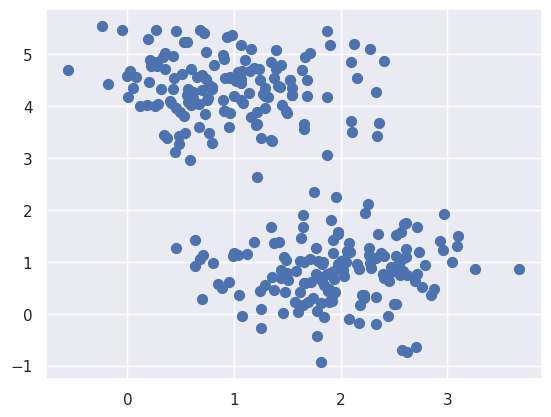

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.datasets import make_blobs
# make_blobs is a function that generates isotropic Gaussian blobs for clustering and returns a tuple of (X, y)
X, y_true = make_blobs(n_samples=300, centers=2,
                       cluster_std=0.60, random_state=0)
print(X.shape)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [2]:
# https://bit.ly/3IAI2hJ 

import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

# Create a dataset for list of coordinates
column_names = ["X","Y"]
df = pd.DataFrame(data=X, columns=column_names)
df.head()

,X,Y
0,2.406157,4.870475
1,2.580767,0.828599
2,1.062696,5.176351
3,2.548219,0.900839
4,1.390161,5.084895


In [3]:
# select from dataframe where X < 0.5 and Y < 0.5
new_df = df[(df['X'] < 0.5) & (df['Y'] < 0.5)]  

In [4]:
def get_random_centroids(data, k = 3):
    #return random samples from the dataset as initial centroids
    cent = (data.sample(n = k))
    return cent

centroids = get_random_centroids(df, 2)
centroids

,X,Y
51,2.219977,0.363115
42,1.652252,3.655828


In [5]:
# pass in dataframe and centroids to assign each data point to a cluster
# return the dataframe with the cluster assignment and the new centroids
def k_means_fit(df,centroids):
    # create a new column in the dataframe to store the cluster assignment
    df['cluster'] = 0

    # calculate the distance between each data point and each centroid
    df['dist1'] = np.sqrt((df['X'] - centroids.iloc[0,0])**2 + (df['Y'] - centroids.iloc[0,1])**2)
    df['dist2'] = np.sqrt((df['X'] - centroids.iloc[1,0])**2 + (df['Y'] - centroids.iloc[1,1])**2)

    #assigning the closest clster to each data point
    df['cluster'] = df[['dist1','dist2']].idxmin(axis=1)
    df['cluster'] = df['cluster'].map({'dist1':0, 'dist2':1})
    df['cluster'] = df['cluster'].astype(int)
    df.head()

    # update cluster centroid to their new mean value to create new centroids
    centroids.iloc[0,0] = df[df['cluster'] == 0]['X'].mean()
    centroids.iloc[0,1] = df[df['cluster'] == 0]['Y'].mean()
    centroids.iloc[1,0] = df[df['cluster'] == 1]['X'].mean()
    centroids.iloc[1,1] = df[df['cluster'] == 1]['Y'].mean()
    centroids.head()
        
    return df, centroids

            X         Y
50   0.798506  0.971897
20   2.258610  2.110290
51   2.219977  0.363115
276  0.431891  4.334955


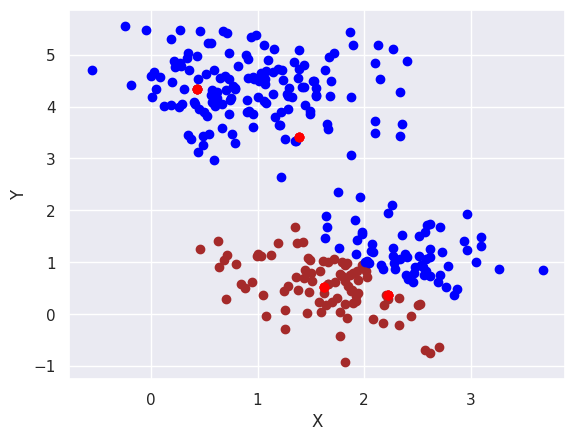

In [7]:
# This is the main Driver for calculating KMeans
centroids = get_random_centroids(df, k = 4)
print(centroids)
# run the k_means_fit function until the centroids converge

df, new_centroids = k_means_fit(df,centroids)
# you may want to plot the centroids as they are recalculated


# once converged, plot the data points and the centroids
#setting color values for our 
color=['brown','blue','green','cyan']

#plot data
for k in range(len(color)):
    # pick only data observations with cluster label == k
    cluster = df[df["cluster"]==k]
    plt.scatter(cluster["X"],cluster["Y"],c=color[k])
    
    #loop plot centroids in red  
    for i in range(len(new_centroids)):
        plt.scatter(new_centroids.iloc[i,0],new_centroids.iloc[i,1],c='red')
  
    #plt.scatter(cent???["X"],cent???["Y"],c='red')
    plt.xlabel('X')
    plt.ylabel('Y')

# KMeans Using Numpy Arrays

[1.25566754 3.38204112]
[-1.45672617  7.48669893]
[0.27239604 5.46996004]
[-1.73163168  7.16447286]
targets AAA: [[ 1.25566754  3.38204112]
 [-1.45672617  7.48669893]
 [ 0.27239604  5.46996004]
 [-1.73163168  7.16447286]]
targets: [[ 0.63223041  2.21223868]
 [ 0.19328008  3.59107052]
 [ 0.11906763  3.75945426]
 [-0.00632763  3.96782089]]
targets: [[ 1.48884828  1.06700268]
 [ 0.82843071  1.82526836]
 [ 0.8453954   2.03255294]
 [-0.00632763  3.96782089]]
targets: [[ 2.01151465  0.81936391]
 [ 1.78137824  0.89237431]
 [ 1.71242319  1.01351556]
 [-0.00632763  3.96782089]]
targets: [[ 2.43953315  0.73517585]
 [ 2.1597536   0.67694991]
 [ 1.94385045  0.87306002]
 [-0.00632763  3.96782089]]
targets: [[ 2.71018185  0.94899521]
 [ 2.41493689  0.60850307]
 [ 1.98258281  0.86771314]
 [-0.00632763  3.96782089]]
targets: [[ 2.77551355  1.17706766]
 [ 2.52811623  0.68369212]
 [ 1.98258281  0.86771314]
 [-0.00632763  3.96782089]]
targets: [[ 2.72597188  1.41962941]
 [ 2.64336202  0.91391934]
 [ 1.98

Text(0, 0.5, 'Y')

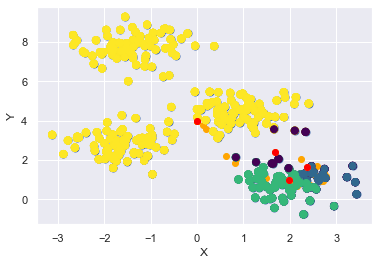

In [2]:
# Create Clusters of points
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()  # for plot styling
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

# This is another implementation using Numpy Arrays


def createClusters(targets, points):
    targetID = np.zeros((len(points), 1))

    # assign point to target
    for index, point in enumerate(points):
        targetID[index] = getClosest(targets, point)
    return targetID  # this maps points to target

# assign point to closest target


def getClosest(targets, point):
    closest = 0
    dmin = np.infty
    for i in range(len(targets)):
        d = np.linalg.norm(targets[i] - point)
        if d < dmin:
            closest = i
            dmin = d
    return closest


def getRandomPoint(X):
    i = np.random.randint(0, len(X)-1)
    return np.array(X[i])


def updateTargets(X, targetID, targets):
    newTargets = np.zeros((0, 2), float)
    points = np.zeros((0, 2), float)
    rowsTarget = targets.shape[0]
    rowsX = X.shape[0]
    for i in range(0, rowsTarget):
        
        for j in range(0, rowsX):
            clusterID = int(targetID[j])
            if clusterID == i:
                point = X[j]
                points = np.append(points, point)

        k = int(np.ceil(len(points)/2))
        points = points.reshape((k, 2))
        newTargets = np.append(newTargets, points.mean(0))
        
    k = int(len(newTargets)/2)
    return newTargets.reshape((k, 2))


# get k random targets
k = 4
targets = np.zeros((k, 2))
for i in range(k):
    centroid = getRandomPoint(X)
    targets[i] = np.array(centroid)

print(f'Initial targets : {targets}')
# loop until targets don't move
for iter in range(10):
    targetID = createClusters(targets, X)

    plt.scatter(X[:, 0], X[:, 1], c=targetID, s=50, cmap='viridis')

    # update the targets
    targets = np.array(updateTargets(X, targetID, targets))

    # plot centroids
    print(f'targets: {targets}')
    centx = targets[:, 0]
    centy = targets[:, 1]
    plt.scatter(centx, centy, c='orange')
    plt.xlabel('X')
    plt.ylabel('Y')

centx = targets[:, 0]
centy = targets[:, 1]
plt.scatter(centx, centy, c='red')
plt.xlabel('X')
plt.ylabel('Y')